# House Prices - Advanced Regression Techniques
This notebook is a solution to the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition. The goal of the competition is to predict the final price of each home given a set of features. The metric used to evaluate the model is the Root Mean Squared Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

## Dependencies
The following dependencies are required to run this notebook:
- tensorflow
- pandas
- seaborn
- kaggle
- scikit-learn

Here we installed them to our current environment using the following commands:

In [1]:
%conda install pandas matplotlib seaborn scikit-learn tensorflow=2.12

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/rdugue/miniconda3/envs/machine-learning

  added / updated specs:
    - matplotlib
    - pandas
    - scikit-learn
    - seaborn
    - tensorflow=2.12


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.3.7           |  py311hf4808d0_0         145 KB
    contourpy-1.2.0            |  py311hdb19cb5_0         263 KB
    cyrus-sasl-2.1.28          |       h9c0eb46_1         237 KB
    joblib-1.2.0               |  py311h06a4308_0         527 KB
    kiwisolver-1.4.4           |  py311h6a678d5_0          70 KB
    libcups-2.4.2              |       ha637b67_0         4.4 MB
    libpq-12.15                |       h37d81fd_1         2.4 MB
    libxml2-2.10.4             |       hcbfbd50_0         755 KB
    matplotlib-3.8.0           |  py311h06a4308_0 

## Data
The data is provided by the competition and can be downloaded from the competition's [data page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). The data is split into two files:
- train.csv: the training set
- test.csv: the test set

This section details the steps taken to preprocess the data and prepare it for training.

### Kaggle Data
Here we download an unzip our data from kaggle using the following commands:

In [22]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '../../'
data_dir = '../../data/house-prices'
!chmod 600 ../../kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques -p {data_dir}
!unzip -o {data_dir}/house-prices-advanced-regression-techniques.zip -d {data_dir}

Here we import all of our relevant libraries.

In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, InputLayer, Dropout
from tensorflow.keras.regularizers import l2

2024-03-19 22:21:20.128384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data Description

In [31]:
data = pd.read_csv(f'{data_dir}/train.csv', index_col='SalePrice')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
SalePrice,,,,,,,,,,,,,,,,,,,,,
208500,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
181500,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
223500,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
140000,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
250000,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [ ]:
data.describe()

### Cleaning and Preprocessing

In [32]:
data.drop(
    columns=['Id', 'Utilities', 'LotShape', 'MSSubClass', 'LandContour', 'LotConfig', 'LandSlope', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], 
    inplace=True
)
data.head()

,MSZoning,LotFrontage,LotArea,Street,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
SalePrice,,,,,,,,,,,,,,,,,,,,,
208500,RL,65.0,8450,Pave,CollgCr,Norm,Norm,1Fam,2Story,7,...,61,0,0,0,0,0,2,2008,WD,Normal
181500,RL,80.0,9600,Pave,Veenker,Feedr,Norm,1Fam,1Story,6,...,0,0,0,0,0,0,5,2007,WD,Normal
223500,RL,68.0,11250,Pave,CollgCr,Norm,Norm,1Fam,2Story,7,...,42,0,0,0,0,0,9,2008,WD,Normal
140000,RL,60.0,9550,Pave,Crawfor,Norm,Norm,1Fam,2Story,7,...,35,272,0,0,0,0,2,2006,WD,Abnorml
250000,RL,84.0,14260,Pave,NoRidge,Norm,Norm,1Fam,2Story,8,...,84,0,0,0,0,0,12,2008,WD,Normal


In [6]:
def scale_features(col):
    if col.dtype == 'int64' or col.dtype == 'float64':
        mean = col.mean()
        std = col.std()
        return (col - mean) / std
    return col

In [7]:
def clean_features(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col], categories = pd.factorize(df[col])
    return df.fillna(0)

In [33]:
data = clean_features(data)
data.head()

,MSZoning,LotFrontage,LotArea,Street,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
SalePrice,,,,,,,,,,,,,,,,,,,,,
208500,0,65.0,8450,0,0,0,0,0,0,7,...,61,0,0,0,0,0,2,2008,0,0
181500,0,80.0,9600,0,1,1,0,0,1,6,...,0,0,0,0,0,0,5,2007,0,0
223500,0,68.0,11250,0,0,0,0,0,0,7,...,42,0,0,0,0,0,9,2008,0,0
140000,0,60.0,9550,0,2,0,0,0,0,7,...,35,272,0,0,0,0,2,2006,0,1
250000,0,84.0,14260,0,3,0,0,0,0,8,...,84,0,0,0,0,0,12,2008,0,0


In [34]:
for col in data.columns:
    if col != 'SalePrice':
        data[col] = scale_features(data[col])
data.head()

,MSZoning,LotFrontage,LotArea,Street,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
SalePrice,,,,,,,,,,,,,,,,,,,,,
208500,-0.426415,0.212804,-0.207071,-0.064216,-1.623576,-0.317359,-0.091522,-0.416176,-0.863949,0.651256,...,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730,-0.292003,-0.394202
181500,-0.426415,0.645526,-0.091855,-0.064216,-1.452278,0.510040,-0.091522,-0.416176,-0.109092,-0.071812,...,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228,-0.292003,-0.394202
223500,-0.426415,0.299349,0.073455,-0.064216,-1.623576,-0.317359,-0.091522,-0.416176,-0.863949,0.651256,...,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730,-0.292003,-0.394202
140000,-0.426415,0.068564,-0.096864,-0.064216,-1.280980,-0.317359,-0.091522,-0.416176,-0.863949,0.651256,...,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186,-0.292003,0.732089
250000,-0.426415,0.760919,0.375020,-0.064216,-1.109682,-0.317359,-0.091522,-0.416176,-0.863949,1.374324,...,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730,-0.292003,-0.394202


In [10]:
train, valid = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
features = train.drop('SalePrice', axis=1)
labels = train['SalePrice']

In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1168 non-null   float64
 1   LotFrontage    1168 non-null   float64
 2   LotArea        1168 non-null   float64
 3   Street         1168 non-null   float64
 4   Neighborhood   1168 non-null   float64
 5   Condition1     1168 non-null   float64
 6   Condition2     1168 non-null   float64
 7   BldgType       1168 non-null   float64
 8   HouseStyle     1168 non-null   float64
 9   OverallQual    1168 non-null   float64
 10  OverallCond    1168 non-null   float64
 11  YearBuilt      1168 non-null   float64
 12  YearRemodAdd   1168 non-null   float64
 13  RoofStyle      1168 non-null   float64
 14  RoofMatl       1168 non-null   float64
 15  Exterior1st    1168 non-null   float64
 16  Exterior2nd    1168 non-null   float64
 17  MasVnrType     1168 non-null   float64
 18  MasVnrArea 

### Visualization

/home/rdugue/miniconda3/envs/machine-learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rdugue/miniconda3/envs/machine-learning/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice'>

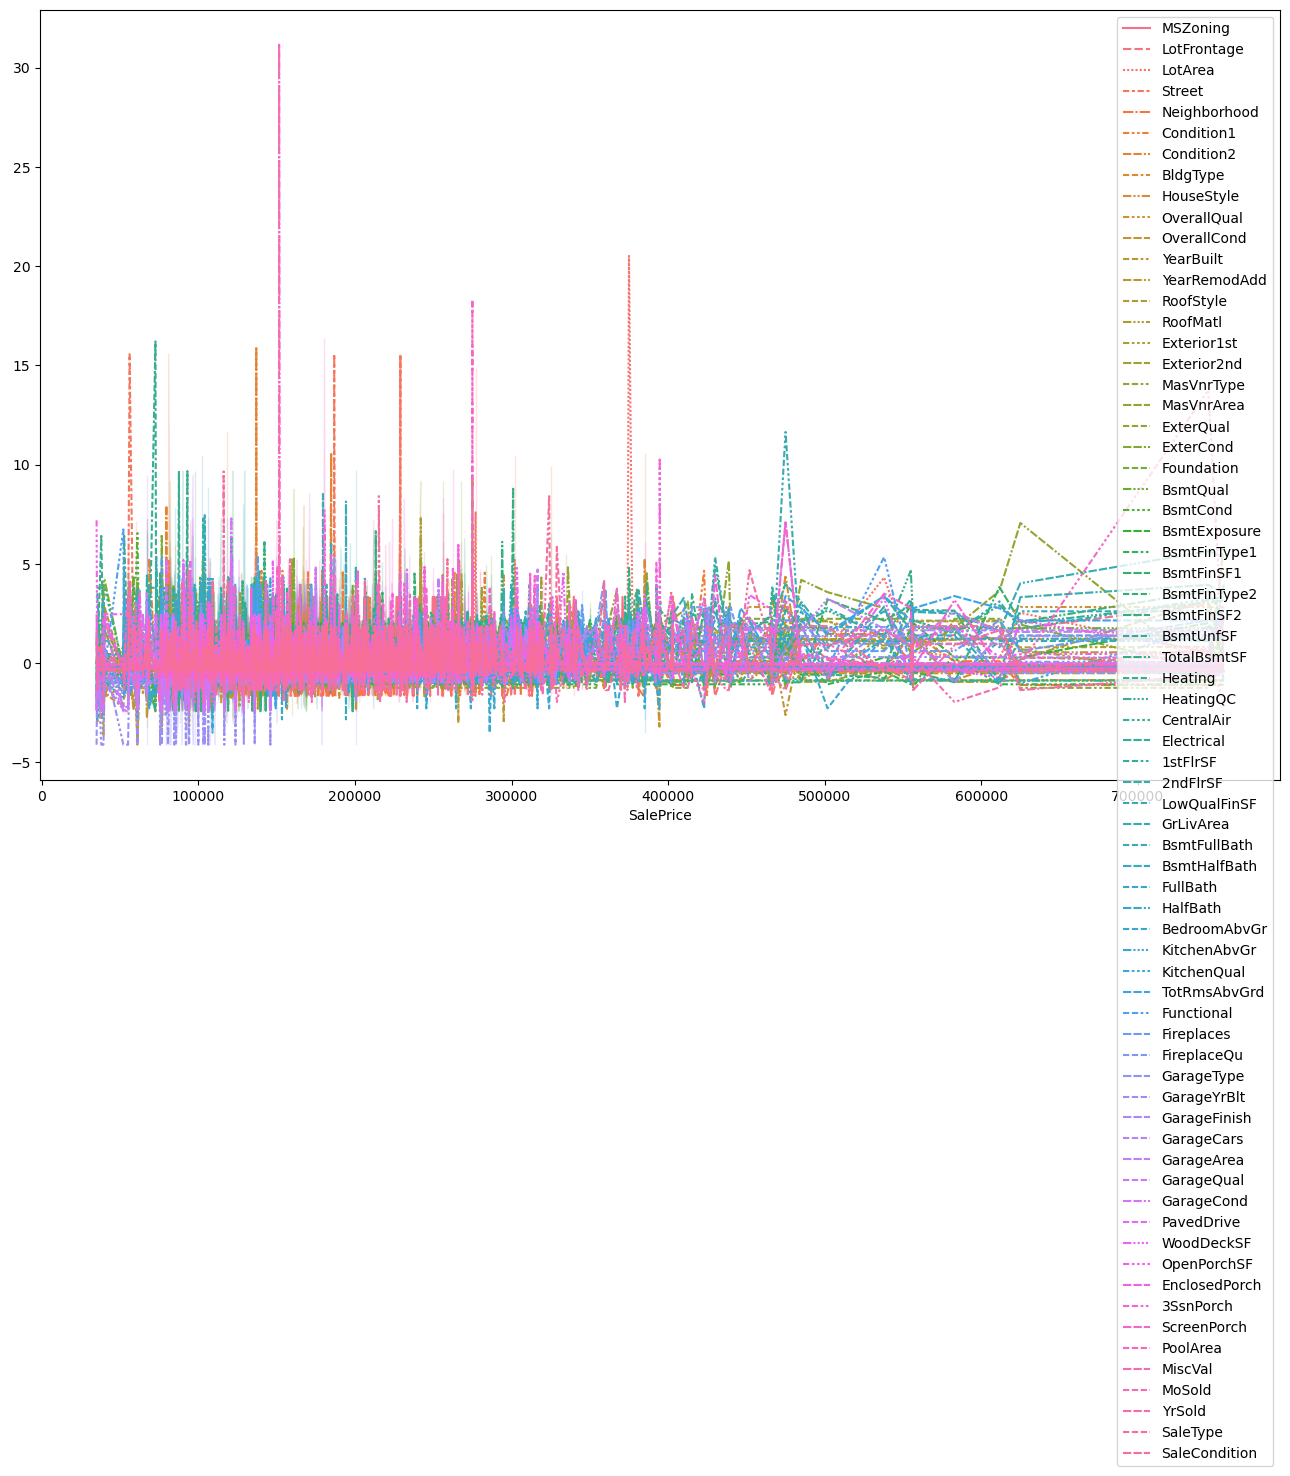

In [35]:
plt.figure(figsize=(16, 10))

sns.lineplot(data)

## Model

In [13]:
model = Sequential(
    [
        InputLayer(input_shape=(features.shape[1],)),
        Dense(64, activation='relu', name='hidden_layer_1', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(64, activation='relu', name='hidden_layer_2', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(1, activation='relu', name='layer_3'),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 64)                4480      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 layer_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


2024-03-19 22:23:02.110803: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=features.shape[0] / 58 * 1000,
    decay_rate=1,
    staircase=False
)
optimizer = tf.keras.optimizers.Adam(lr_schedule)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])


### Validation


In [15]:
valid_features = valid.drop('SalePrice', axis=1)
valid_labels = valid['SalePrice']

In [16]:
data = model.fit(
    features, labels, 
    epochs=1168, 
    steps_per_epoch=20, 
    batch_size=58,
    validation_data=(valid_features, valid_labels))

Epoch 1/1168
20/20 [==============================] - 1s 39ms/step - loss: 38653546496.0000 - mean_squared_error: 38653546496.0000 - val_loss: 39653122048.0000 - val_mean_squared_error: 39653122048.0000
Epoch 2/1168
20/20 [==============================] - 1s 36ms/step - loss: 39477526528.0000 - mean_squared_error: 39477526528.0000 - val_loss: 39651487744.0000 - val_mean_squared_error: 39651487744.0000
Epoch 3/1168
20/20 [==============================] - 0s 15ms/step - loss: 38112862208.0000 - mean_squared_error: 38112862208.0000 - val_loss: 39648161792.0000 - val_mean_squared_error: 39648161792.0000
Epoch 4/1168
20/20 [==============================] - 1s 41ms/step - loss: 38965972992.0000 - mean_squared_error: 38965972992.0000 - val_loss: 39641309184.0000 - val_mean_squared_error: 39641309184.0000
Epoch 5/1168
20/20 [==============================] - 1s 29ms/step - loss: 38971211776.0000 - mean_squared_error: 38971211776.0000 - val_loss: 39628197888.0000 - val_mean_squared_error: 39

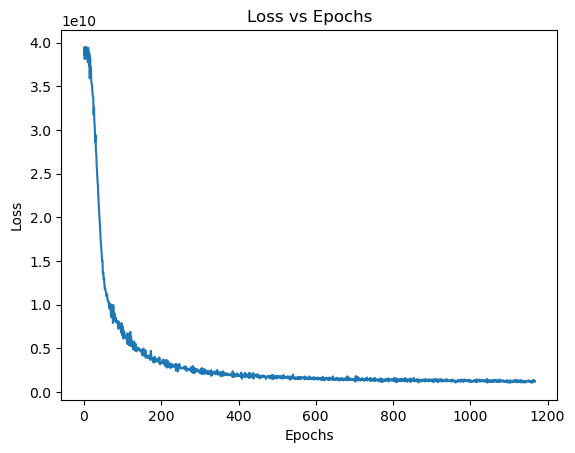

In [17]:
plt.plot(data.history['loss']) 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

## Submission

In [18]:
test = pd.read_csv(f'{data_dir}/test.csv')
test.drop(
    columns=['Id', 'Utilities', 'LotShape', 'MSSubClass', 'LandContour', 'LotConfig', 'LandSlope', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], 
    inplace=True
)
clean_test = clean_features(test)
for col in clean_test.columns:
    clean_test[col] = scale_features(clean_test[col])
clean_test.head()

,MSZoning,LotFrontage,LotArea,Street,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-2.038971,0.684614,0.363804,-0.064238,-1.449058,-0.989892,-0.088342,-0.396175,-0.735377,-0.750844,...,-0.701387,-0.360615,-0.088796,1.818336,-0.057207,-0.092212,-0.038268,1.713318,-0.320112,-0.393068
1,-0.453225,0.715606,0.897553,-0.064238,-1.449058,-0.219624,-0.088342,-0.396175,-0.735377,-0.054858,...,-0.178765,-0.360615,-0.088796,-0.301440,-0.057207,19.723675,-0.038268,1.713318,-0.320112,-0.393068
2,-0.453225,0.498660,0.809368,-0.064238,-1.308525,-0.219624,-0.088342,-0.396175,0.082394,-0.750844,...,-0.207799,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-1.140224,1.713318,-0.320112,-0.393068
3,-0.453225,0.622629,0.032053,-0.064238,-1.308525,-0.219624,-0.088342,-0.396175,0.082394,-0.054858,...,-0.178765,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-0.038268,1.713318,-0.320112,-0.393068
4,-0.453225,-0.462102,-0.971475,-0.064238,-1.167993,-0.219624,-0.088342,0.728376,-0.735377,1.337113,...,0.489031,-0.360615,-0.088796,2.242291,-0.057207,-0.092212,-1.874861,1.713318,-0.320112,-0.393068


In [19]:
submission = pd.read_csv(f'{data_dir}/sample_submission.csv')
for i in range(test.shape[0]):
    submission.loc[i, 'SalePrice'] = model.predict(clean_test.iloc[i].values.reshape(1, -1))
submission.head()

1/1 [==============================] - 0s 56ms/step


,Id,SalePrice
0,1461,112337.578125
1,1462,141589.093750
2,1463,167320.718750
3,1464,185133.890625
4,1465,181452.781250


In [20]:
submission.to_csv(f'{data_dir}/submission.csv', index=False)

In [23]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f {data_dir}/submission.csv -m "Final submission using tensorflow."

100%|██████████████████████████████████████| 25.9k/25.9k [00:00<00:00, 49.5kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques